In [1]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(123)
ar_params = np.array([0.75])
ma_params = np.array([])
index_name = ['const','ar(1)']
ahead = 100
ar, ma = np.r_[1, -ar_params], np.r_[1, ma_params]
ar_order, ma_order = len(ar)-1, len(ma)-1

In [3]:
y = statsmodels.tsa.arima_process.arma_generate_sample(ar, ma, nsample=1000, burnin=500)
fit = statsmodels.tsa.arima_model.ARMA(y, (ar_order, ma_order)).fit(trend='c',disp=0)

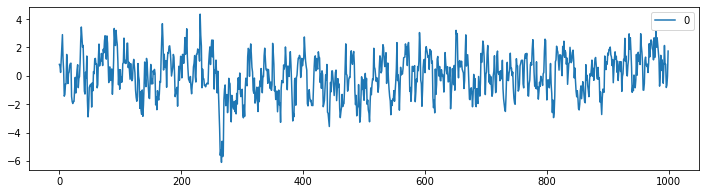

In [4]:
pd.DataFrame(y).plot(figsize=(12,3))
plt.show()

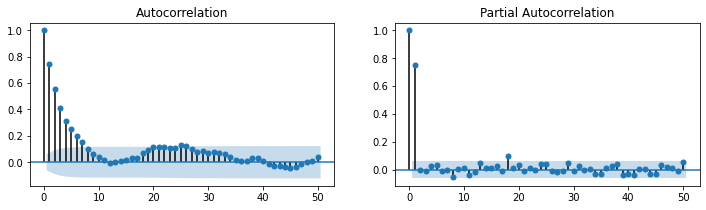

In [5]:
plt.figure(figsize=(12,3))
statsmodels.graphics.tsaplots.plot_acf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(121))
statsmodels.graphics.tsaplots.plot_pacf(y, lags=50, zero=True, use_vlines=True, alpha=0.05, ax=plt.subplot(122))
plt.show()

In [6]:
pred_ts_point = fit.forecast(steps=ahead)[0]
pred_ts_interval = fit.forecast(steps=ahead)[2]

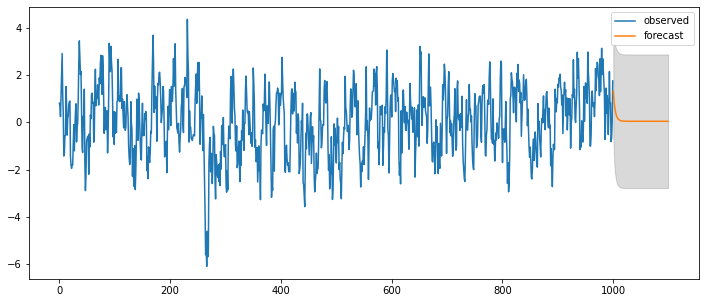

In [7]:
ax=pd.DataFrame(y).plot(figsize=(12,5))
forecast_index = [i for i in range(pd.DataFrame(y).index.max()+1, pd.DataFrame(y).index.max()+ahead+1)]
pd.DataFrame(pred_ts_point, index=forecast_index).plot(label='forecast',ax=ax)
ax.fill_between(pd.DataFrame(pred_ts_interval, index=forecast_index).index,
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,0],
                pd.DataFrame(pred_ts_interval, index=forecast_index).iloc[:,1], color='k', alpha=0.15)
plt.legend(['observed','forecast'])

In [8]:
#display(fit.summary)
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1377.265
Method:                       css-mle   S.D. of innovations              0.959
Date:                Thu, 21 Jul 2022   AIC                           2760.530
Time:                        07:33:59   BIC                           2775.254
Sample:                             0   HQIC                          2766.126
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0406      0.120      0.339      0.735      -0.194       0.275
ar.L1.y        0.7475      0.021     35.619      0.000       0.706       0.789
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3379           +0.0000j            1.3379            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
#display(fit.summary2)
fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
===================================================================
Model:              ARMA             BIC:                 2775.2536
Dependent Variable: y                Log-Likelihood:      -1377.3  
Date:               2022-07-21 07:33 Scale:               1.0000   
No. Observations:   1000             Method:              css-mle  
Df Model:           2                Sample:              0        
Df Residuals:       998                                   0        
Converged:          1.0000           S.D. of innovations: 0.959    
No. Iterations:     5.0000           HQIC:                2766.126 
AIC:                2760.5304                                      
---------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------
const         0.0406     0.1197    0.3389   0.7348   -0.1940   0.2752
ar.L1.y       0.7475     0.0210   35.6193   0.0000    0.7063   0.7886
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1           1.3379             0.0000           1.3379             0.0000
===================================================================

"""